<a id="top"></a>
 <font size="5">testing models</font>
> 

> * Prepared by Alfredo López
> * alfredo.lopez@scch.at
> 
<hr>
<hr>

In [1]:
import pitsa
import importlib
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

{'intercept': nan, 'slope': nan}
{'intercept': 1.3820594713991916, 'slope': 1.8058497701131144}


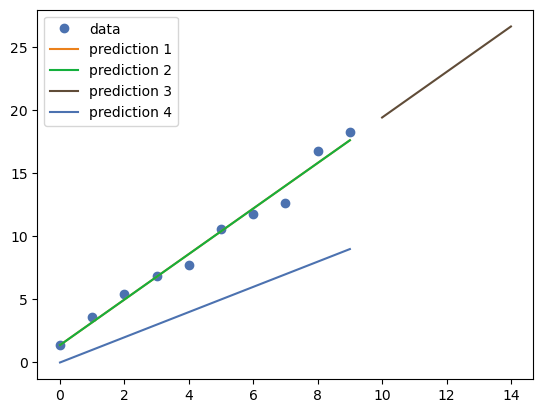

In [2]:
model = LinearRegression()
sklearn_model = pitsa.models.regression.SKLearnModel(model=model, name='Linear-Regression')
print(sklearn_model.params)

t = np.arange(0, 10, 1).reshape((-1,1))
y = 2*t + 1 + np.random.randn(10).reshape((-1,1))
sklearn_model.fit(t, y)
print(sklearn_model.params)
y_pred_1 = sklearn_model.predict(start=0, end=9)
y_pred_2 = sklearn_model.predict(t)
t_fore, y_pred_3 = sklearn_model.forecast(forecast_lenght=5, return_time_stamps=True)

plt.plot(t, y, 'o', label='data')
plt.plot(t, y_pred_1, label='prediction 1')
plt.plot(t, y_pred_2, label='prediction 2')
plt.plot(t_fore, y_pred_3, label='prediction 3')


sklearn_model.set_params({'intercept':0, 'slope':1})
y_pred_4 = sklearn_model.predict(t)
plt.plot(t, y_pred_4, label='prediction 4')
plt.legend() 

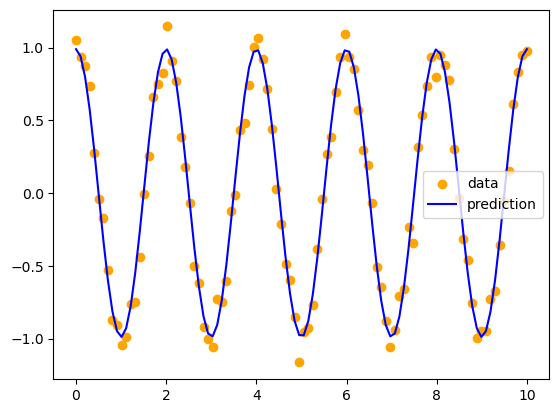

In [3]:
# Fix the random seed
np.random.seed(42)
# data
t = np.linspace(0, 10, 100) 
sigma = 0.1
y = np.cos(np.pi*t) + sigma*np.random.normal(0, 1, t.shape)
# construct model
params_fixed = {'intercept':0,'frequency': np.pi, 'phase': 0}
params_init = {'amplitude': 1}
fit_args = {'params_fixed':params_fixed, 'params_init':params_init}
#cos = pitsa.models.kbf.Cosine(fit_args=fit_args)
cos = pitsa.models.regression.Cosine()
# fit
cos._fit(t,y, params_fixed=params_fixed, params_init=params_init)
y_pred = cos.predict(t)
# plot
plt.scatter(t, y, marker='o', color='orange', label='data')
plt.plot(t, y_pred, color='blue', label='prediction')
plt.legend()